## Load the dataset

In [1]:
import pandas as pd

log_df = pd.read_csv("shipping_data.csv")
log_df.head()




,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China)


## Check number of rows and columns in the dataset

In [2]:
log_df.shape

(263821, 8)

## Preview the first 5 rows

In [7]:
log_df.head()

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China)


## Check missing values per column

In [8]:
log_df.isnull().sum()

name                   0
price ($)              0
weight (kg)           13
length (m)           184
width (m)              0
height (m)             0
shipment date       2638
destination port      26
dtype: int64

## Removes rows missing critical shipment information

In [9]:
log_df = log_df.dropna(subset=["shipment date", "destination port"])

## Replace missing numeric values wit medians

In [10]:
log_df["weight (kg)"] = log_df["weight (kg)"].fillna(log_df["weight (kg)"].median())
log_df["length (m)"] = log_df["length (m)"].fillna(log_df["length (m)"].median())

## Ports with the most shipment

In [11]:
shipment_by_port = log_df["destination port"].value_counts()
shipment_by_port.head(10)

destination port
Port of Busan (South Korea)      52677
Port of Tianjin (China)          52561
Port of Tokyo (Japan)            52303
Port of Singapore (Singapore)    51851
Port of Shanghai (China)         51765
Name: count, dtype: int64

## Identify ports associated with highest-value shipment

In [12]:
avg_price_port = (log_df.groupby("destination port")["price ($)"]
                  .mean()
                  .sort_values(ascending=False)
)

avg_price_port.head(10)
                   
                   

destination port
Port of Tianjin (China)          4598.366195
Port of Busan (South Korea)      4279.110533
Port of Tokyo (Japan)            4107.699680
Port of Singapore (Singapore)    3990.965324
Port of Shanghai (China)         3930.117414
Name: price ($), dtype: float64

## Visualize price distribution and outliers

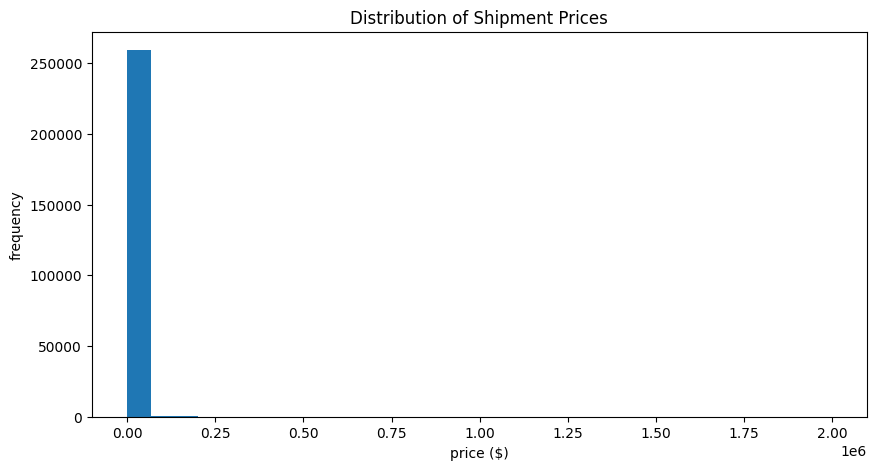

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(log_df["price ($)"], bins=30)
plt.title("Distribution of Shipment Prices")
plt.xlabel("price ($)")
plt.ylabel("frequency")
plt.show()

## Shipment weight analysis

In [14]:
log_df["weight (kg)"].describe()

count    261157.000000
mean        323.899334
std        1519.676228
min           0.050000
25%           0.710000
50%           2.960000
75%          67.310000
max       24982.350000
Name: weight (kg), dtype: float64

## Top heaviest shipments

In [15]:
log_df.sort_values("weight (kg)",ascending=False).head(10)

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
258506,Pallete of Laptops,11257.78,24982.35,0.50,0.44,0.16,2023-03-26,Port of Tianjin (China)
59238,Pallete of Laptops,11907.32,24980.15,0.76,0.56,0.10,2023-03-21,Port of Singapore (Singapore)
71598,Pallete of Laptops,10368.22,24977.65,0.81,0.52,0.15,2023-03-16,Port of Tokyo (Japan)
165463,Pallete of Laptops,10948.99,24975.39,0.71,0.52,0.18,2023-03-17,Port of Singapore (Singapore)
80166,Pallete of Laptops,10911.59,24968.59,0.56,0.48,0.10,2023-03-13,Port of Shanghai (China)
54899,Pallete of Laptops,11057.91,24961.47,0.67,0.59,0.17,2023-03-27,Port of Tianjin (China)
85683,Pallete of Laptops,10402.13,24957.65,0.80,0.51,0.19,2023-03-17,Port of Singapore (Singapore)
196190,Pallete of Laptops,11465.88,24956.64,0.98,0.49,0.16,2023-03-15,Port of Shanghai (China)
139692,Pallete of Laptops,11399.40,24945.26,0.55,0.54,0.11,2023-03-27,Port of Busan (South Korea)
70003,Pallete of Laptops,11476.93,24944.99,0.91,0.47,0.17,2023-03-14,Port of Shanghai (China)


## Create shipnment volune feature

In [16]:
log_df["volume"] = log_df["length (m)"] * log_df["width (m)"] * log_df["height (m)"]


## Statistical summary of shipment sizes

In [17]:
log_df["volume"].describe()

count    261157.000000
mean          1.570146
std          21.345422
min           0.000010
25%           0.009880
50%           0.056448
75%           0.452985
max         937.870473
Name: volume, dtype: float64

## Identify largest shipments

In [20]:
log_df.sort_values("volume", ascending=False).head(10)

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
69729,Sailboat,246869.51,2468.41,28.11,5.57,5.99,2023-03-12,Port of Tokyo (Japan),937.870473
970,Sailboat,230478.97,1941.18,27.01,5.75,5.85,2023-03-26,Port of Busan (South Korea),908.548875
11811,Sailboat,391395.82,1632.29,28.75,5.59,5.62,2023-03-22,Port of Tianjin (China),903.204250
164689,Sailboat,306497.03,1618.41,28.02,5.42,5.82,2023-03-22,Port of Singapore (Singapore),883.874088
49219,Sailboat,281891.59,2912.95,27.92,5.33,5.84,2023-03-22,Port of Tokyo (Japan),869.071424
213702,Sailboat,51331.38,664.35,25.96,5.49,5.92,2023-03-24,Port of Singapore (Singapore),843.720768
148900,Sailboat,301547.47,2648.15,25.96,5.55,5.85,2023-03-22,Port of Busan (South Korea),842.856300
202438,Sailboat,228404.06,2011.88,29.67,4.91,5.72,2023-03-15,Port of Shanghai (China),833.287884
14067,Sailboat,449823.97,1024.75,27.77,5.35,5.51,2023-03-18,Port of Busan (South Korea),818.617945
52748,Sailboat,153579.15,1589.46,25.53,5.71,5.49,2023-03-15,Port of Busan (South Korea),800.311887


## Key Findings
- The dataset contains 263,821 shipments across multiple destination ports.
- Certain ports handle significantly hihjer shipment volumes.
- Shipment prices vary widely, with noticeable high-value outliers.
- Shipment volumne (calculated from dimensions) shows strong variation, indicating differences in cargo size distribution.
- Some ports are associated with higher average shipment prices, suggesting premium trade routes.

## Operational Insights
- High-volume ports may require better resources allocation and operational planning.
- High-value shipment destionation couls represent strategic trade routes.
- Large-volume shipment may require specialized handling and storage capacity.
- Outliers in price or size may need additional verification or risk assessment.

## Data Preparation Summary
- Missing values in numerical fields (weight, length) were handled using median inputation.
- Rows missing critical shipment information were removed.
- A new feature, shipment volume, was engineered for deeper analysis.

## This project reflects my growing ability to explore, clean, analyze, and derive insights from real-world operational datasets.